In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('retail_data.csv',encoding= 'unicode_escape') # dataset given the a UK retail store dataset
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# # Subtract Missing Observations from the Data Set.
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
df["Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [10]:
# filtering the duplicate data
filtered_data=df[['Country','CustomerID']].drop_duplicates()

<AxesSubplot:>

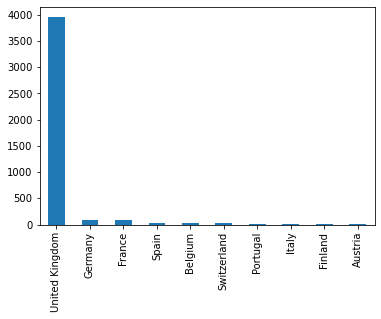

In [11]:
# plot top 10 countries based on the count
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [12]:
# converting the date and time to proper format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
df.describe().T # T for transpose

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [15]:
print(df["Description"].nunique()) # No of unique items in Description and stock code
print(df["StockCode"].nunique())

3896
3684


In [16]:
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
FIRE POLISHED GLASS BRACELET RED         1
GIRLY PINK TOOL SET                      1
RED ROSE AND LACE C/COVER                1
PURPLE/TURQ FLOWERS HANDBAG              1
DUSTY PINK CHRISTMAS TREE 30CM           1
Name: Description, Length: 3896, dtype: int64

In [17]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head(5)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [18]:
df.head(157)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,2010-12-01 09:45:00,14.95,16098.0,United Kingdom
153,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4,2010-12-01 09:45:00,16.95,16098.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
155,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074.0,United Kingdom


In [19]:
# removing the C that is contained in InvoiceNo (reference CustomerID 536383)
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

In [20]:
df.head(157)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
153,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4,2010-12-01 09:45:00,16.95,16098.0,United Kingdom
155,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074.0,United Kingdom
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074.0,United Kingdom
157,536384,22464,HANGING METAL HEART LANTERN,12,2010-12-01 09:53:00,1.65,18074.0,United Kingdom


In [21]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-21-18878337d6d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [23]:
today_date = dt.datetime(2011, 12, 11)
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()


,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [24]:
rfm = rfm[rfm["monetary"] > 0]
rfm

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [25]:
rfm["R"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["F"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# 1 1,1,2,3,3,3,3,3,
rfm["M"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm["RFM_concat"] = (rfm['R'].astype(str) +
                    rfm['F'].astype(str)+rfm['M'].astype(str))
rfm.head()


,recency,frequency,monetary,R,F,M,RFM_concat
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,3,7,4310.00,5,5,5,555
12348.0,76,4,1797.24,2,4,4,244
12349.0,19,1,1757.55,4,1,4,414
12350.0,311,1,334.40,1,1,2,112


In [26]:
rfm['RFMScore'] = rfm[['R','F','M']].sum(axis=1)

In [27]:
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_concat,RFMScore
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,3,7,4310.00,5,5,5,555,15
12348.0,76,4,1797.24,2,4,4,244,10
12349.0,19,1,1757.55,4,1,4,414,9
12350.0,311,1,334.40,1,1,2,112,4


In [28]:
def rfm_level(df):
    if df['RFMScore'] >= 10:
        return 'Can\'t Loose Them'
    elif ((df['RFMScore'] >= 8) and (df['RFMScore'] < 10)):
        return 'Champions'
    elif ((df['RFMScore'] >= 7) and (df['RFMScore'] < 8)):
        return 'Loyal'
    elif ((df['RFMScore'] >= 6) and (df['RFMScore'] < 7)):
        return 'Potential'
    elif ((df['RFMScore'] >= 5) and (df['RFMScore'] < 6)):
        return 'Promising'
    elif ((df['RFMScore'] >= 4) and (df['RFMScore'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_concat,RFMScore,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,Loyal
12347.0,3,7,4310.00,5,5,5,555,15,Can't Loose Them
12348.0,76,4,1797.24,2,4,4,244,10,Can't Loose Them
12349.0,19,1,1757.55,4,1,4,414,9,Champions
12350.0,311,1,334.40,1,1,2,112,4,Needs Attention


In [29]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)


                   recency frequency monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them      30.0       7.7   3948.0  1939
Champions             79.5       2.2    875.6   708
Loyal                 98.2       1.6    705.4   384
Needs Attention      238.2       1.0    216.3   364
Potential            123.8       1.3    383.4   422
Promising            177.1       1.1    291.2   339
Require Activation   288.3       1.0    144.3   182


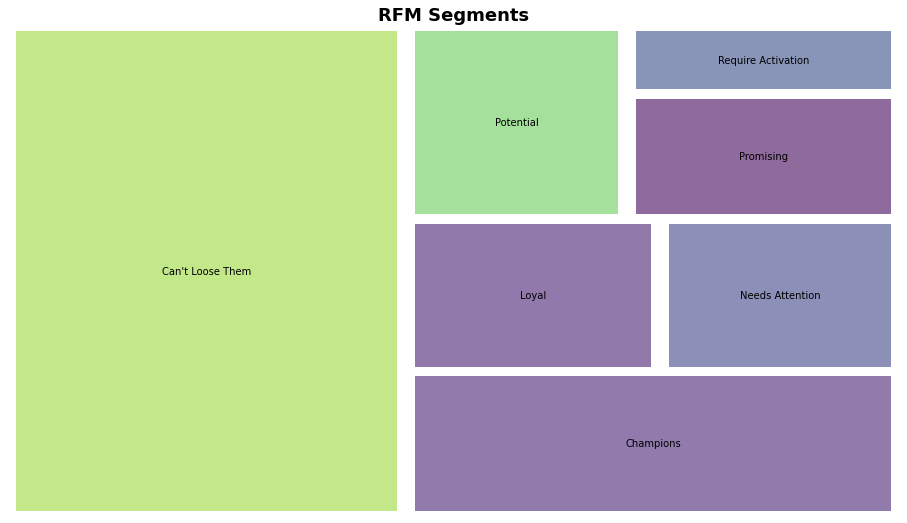

In [30]:
import squarify
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 ,pad=True)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()


In [31]:
Loyalty_Level= ['Bronze','Silver', 'Gold','Platinum']
Score_cuts = pd.qcut(rfm.RFMScore,q=4, labels= Loyalty_Level)
rfm['RFM_Loyalty_Level']= Score_cuts.values
rfm.reset_index().head(10)



,CustomerID,recency,frequency,monetary,R,F,M,RFM_concat,RFMScore,RFM_Level,RFM_Loyalty_Level
0,12346.0,326,1,77183.60,1,1,5,115,7,Loyal,Silver
1,12347.0,3,7,4310.00,5,5,5,555,15,Can't Loose Them,Platinum
2,12348.0,76,4,1797.24,2,4,4,244,10,Can't Loose Them,Gold
3,12349.0,19,1,1757.55,4,1,4,414,9,Champions,Silver
4,12350.0,311,1,334.40,1,1,2,112,4,Needs Attention,Bronze
5,12352.0,37,8,2506.04,3,5,5,355,13,Can't Loose Them,Platinum
6,12353.0,205,1,89.00,1,1,1,111,3,Require Activation,Bronze
7,12354.0,233,1,1079.40,1,1,4,114,6,Potential,Bronze
8,12355.0,215,1,459.40,1,1,2,112,4,Needs Attention,Bronze
9,12356.0,23,3,2811.43,4,3,5,435,12,Can't Loose Them,Gold


In [32]:
rfm[rfm['RFM_concat']=='333'].sort_values('monetary', ascending=False).reset_index().head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM_concat,RFMScore,RFM_Level,RFM_Loyalty_Level
0,14475.0,72,3,925.85,3,3,3,333,9,Champions,Silver
1,17018.0,41,2,920.10,3,3,3,333,9,Champions,Silver
2,15211.0,61,2,894.41,3,3,3,333,9,Champions,Silver
3,16121.0,58,2,867.11,3,3,3,333,9,Champions,Silver
4,14193.0,68,2,853.39,3,3,3,333,9,Champions,Silver


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
Log_data = rfm[['recency','frequency','monetary']].apply(np.log,axis=1).round(3)

def handle_neg_val(num):
    if num <=0:
        return 1
    else:
        return num

Log_data['recency'] = [handle_neg_val(x) for x in Log_data.recency]
Log_data['frequency'] = [handle_neg_val(x) for x in Log_data.frequency]
Log_data['monetary'] = [handle_neg_val(x) for x in Log_data.monetary]

In [35]:
Log_data.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,5.787,1.000,11.254
12347.0,1.099,1.946,8.369
12348.0,4.331,1.386,7.494
12349.0,2.944,1.000,7.472
12350.0,5.740,1.000,5.812


E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recency', ylabel='Density'>

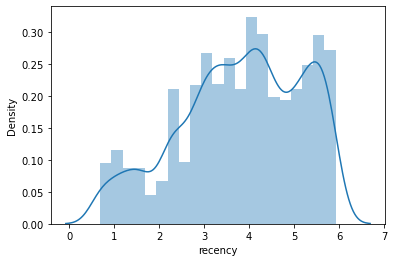

In [36]:
sns.distplot(Log_data.recency)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frequency', ylabel='Density'>

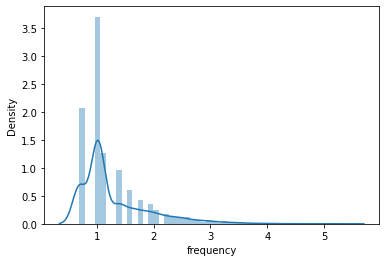

In [37]:
sns.distplot(Log_data.frequency)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monetary', ylabel='Density'>

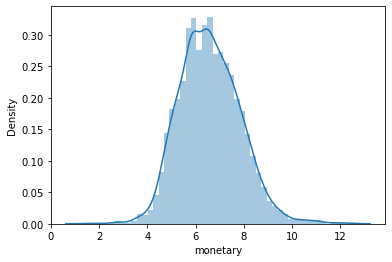

In [38]:
sns.distplot(Log_data.monetary)

In [39]:
scale = StandardScaler()
scaled_data = scale.fit_transform(Log_data)

scaled_data = pd.DataFrame(scaled_data, index= rfm.index,columns=Log_data.columns)

In [40]:
scaled_data.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,1.450012,-0.464100,3.698763
12347.0,-1.986790,1.056767,1.410440
12348.0,0.382610,0.156465,0.716408
12349.0,-0.634209,-0.464100,0.698958
12350.0,1.415556,-0.464100,-0.617720


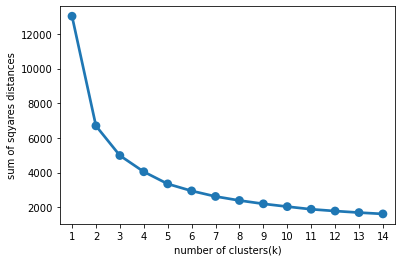

sse(2) 6695.101697987069
sse(3) 4984.579973403223
sse(4) 4048.980680272891
sse(5) 3349.248682777594


In [57]:
SSE_data= {}

for k in range(1,15):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km= km.fit(scaled_data)
    SSE_data[k]=km.inertia_
    
    
sns.pointplot(x=list(SSE_data.keys()),y= list(SSE_data.values()))
plt.xlabel('number of clusters(k)')
plt.ylabel('sum of sqyares distances')
plt.show()



print('sse(2)',SSE_data[2])
print('sse(3)',SSE_data[3])
print('sse(4)',SSE_data[4])
print('sse(5)',SSE_data[5])



In [63]:
SSE_data

{1: 13014.000000000005,
 2: 6695.101697987069,
 3: 4984.579973403223,
 4: 4048.980680272891,
 5: 3349.248682777594,
 6: 2946.020585355619,
 7: 2625.072824958143,
 8: 2392.851205586429,
 9: 2200.1357292823977,
 10: 2038.7780674728144,
 11: 1887.2056710168904,
 12: 1784.3879450486575,
 13: 1694.8086284670765,
 14: 1618.140687268817}

<AxesSubplot:>

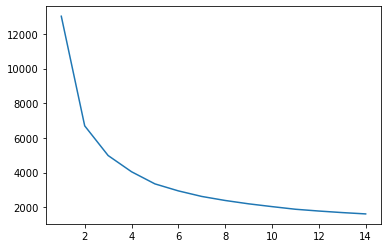

In [64]:
sns.lineplot(x=list(SSE_data.keys()),y= list(SSE_data.values()))

In [65]:
KMeans_clust = KMeans(n_clusters=2, init= 'k-means++',max_iter= 1000)

KMeans_clust.fit(scaled_data)

rfm['Cluster']= KMeans_clust.labels_
rfm.head(10)

,recency,frequency,monetary,R,F,M,RFM_concat,RFMScore,RFM_Level,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,Loyal,Silver,0,blue
12347.0,3,7,4310.00,5,5,5,555,15,Can't Loose Them,Platinum,0,red
12348.0,76,4,1797.24,2,4,4,244,10,Can't Loose Them,Gold,1,blue
12349.0,19,1,1757.55,4,1,4,414,9,Champions,Silver,1,blue
12350.0,311,1,334.40,1,1,2,112,4,Needs Attention,Bronze,1,yellow
12352.0,37,8,2506.04,3,5,5,355,13,Can't Loose Them,Platinum,0,blue
12353.0,205,1,89.00,1,1,1,111,3,Require Activation,Bronze,1,yellow
12354.0,233,1,1079.40,1,1,4,114,6,Potential,Bronze,1,yellow
12355.0,215,1,459.40,1,1,2,112,4,Needs Attention,Bronze,1,yellow


<AxesSubplot:xlabel='recency', ylabel='frequency'>

<Figure size 504x504 with 0 Axes>

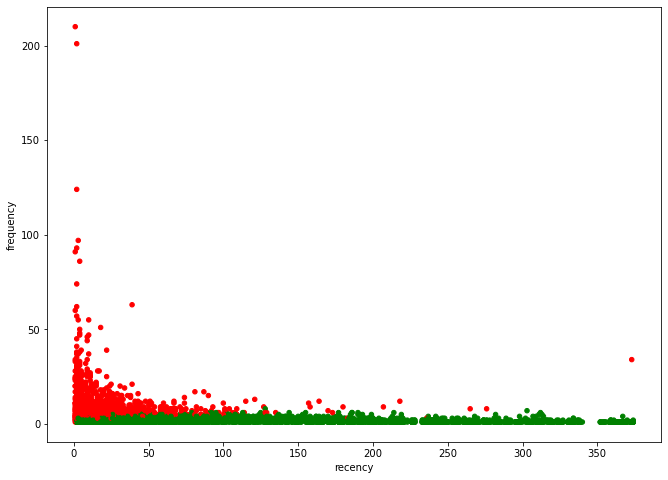

In [66]:
plt.figure(figsize=(7,7))

Colors=["red","green",'blue','yellow']
rfm['Color'] = rfm['Cluster'].map(lambda p: Colors[p])
rfm.plot(kind="scatter",x="recency",y="frequency",figsize=(11,8),c=rfm['Color'])

<AxesSubplot:xlabel='frequency', ylabel='recency'>

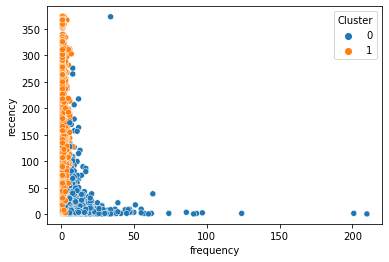

In [67]:
sns.scatterplot(x='frequency',y='recency',hue='Cluster',data=rfm)

In [68]:
#scale = StandardScaler()
scaled_data1 = scale.fit_transform(rfm[['recency','frequency','monetary']])
scaled_data1 = pd.DataFrame(scaled_data1, index= rfm.index,columns=rfm.columns[[0,1,2]])

In [69]:
rfm.columns[[0,1,2]]

Index(['recency', 'frequency', 'monetary'], dtype='object')

In [70]:
scaled_data1.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,2.329388,-0.424733,8.358668
12347.0,-0.900588,0.353949,0.250966
12348.0,-0.170593,-0.035392,-0.028596
12349.0,-0.740589,-0.424733,-0.033012
12350.0,2.179389,-0.424733,-0.191347


In [71]:
rfm_copy=rfm.copy()

In [72]:
scale_Min_Max = MinMaxScaler()
scaled_data2 = scale_Min_Max.fit_transform(rfm[['recency','frequency','monetary']])
scaled_data2 = pd.DataFrame(scaled_data1, index= rfm.index,columns=rfm.columns[[0,1,2]])

In [73]:
scaled_data2.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,2.329388,-0.424733,8.358668
12347.0,-0.900588,0.353949,0.250966
12348.0,-0.170593,-0.035392,-0.028596
12349.0,-0.740589,-0.424733,-0.033012
12350.0,2.179389,-0.424733,-0.191347


In [74]:
from sklearn.metrics import silhouette_score

In [75]:
s=[]
for i in range(3,20):
    labels=KMeans(n_clusters=i, init= 'k-means++',max_iter= 1000).fit(scaled_data).labels_
    print(labels)
    s.append(silhouette_score(scaled_data,labels,metric='euclidean'))
    print('silhouette score for k(Clusters)= '+str(i) +' is  ', s[i-3])

[1 1 2 ... 2 1 2]
silhouette score for k(Clusters)= 3 is   0.32965985862496233
[0 2 0 ... 3 2 0]
silhouette score for k(Clusters)= 4 is   0.3237501371691119
[2 0 2 ... 3 4 2]
silhouette score for k(Clusters)= 5 is   0.3081334190700159
[2 5 2 ... 3 1 0]
silhouette score for k(Clusters)= 6 is   0.3002039575876411
[0 5 0 ... 6 5 0]
silhouette score for k(Clusters)= 7 is   0.29426939832882915
[7 5 7 ... 3 0 7]
silhouette score for k(Clusters)= 8 is   0.28927988111016256
[3 1 3 ... 8 7 0]
silhouette score for k(Clusters)= 9 is   0.27905895291853433
[4 6 1 ... 5 2 0]
silhouette score for k(Clusters)= 10 is   0.278493096005056
[10  0 10 ...  8  6 10]
silhouette score for k(Clusters)= 11 is   0.2813482307321298
[8 4 8 ... 7 2 1]
silhouette score for k(Clusters)= 12 is   0.27827190973946014
[ 4  8  4 ...  9  5 10]
silhouette score for k(Clusters)= 13 is   0.27086489055343066
[ 1 11  1 ...  8  6  5]
silhouette score for k(Clusters)= 14 is   0.2650031668933352
[13  9 10 ... 12  9  2]
silhouette s

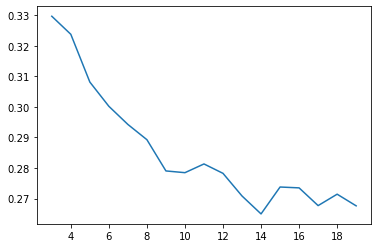

In [76]:
plt.plot(range(3,20),s,)

In [77]:
'''so we see that value of sil_score is max at 3 hence optimal no. of cluster is 3'''

'so we see that value of sil_score is max at 3 hence optimal no. of cluster is 3'